In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [52]:
#load the data after updating them using Generator.ipynb (Instructions, Resources)
crypto_orig = pd.read_csv(('Resources//crypto_data.csv'), index_col = 0)

In [55]:
crypto_name = pd.read_csv(('Resources//crypto_data.csv'))
crypto_name = pd.DataFrame(crypto_name)
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_names = crypto_name.filter(['CoinName'], axis=1)
coin_names

,CoinName
0,42 Coin
1,365Coin
2,404Coin
3,SixEleven
4,808
...,...
1247,BitcoinPlus
1248,DivotyCoin
1249,Giotto Coin
1250,OpenSourceCoin


In [53]:
crypto_orig = pd.DataFrame(crypto_orig)
crypto_orig.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [31]:
# Method 1 - Filter dataframe
crypto_trading = crypto_orig[crypto_orig['IsTrading'] == True]
crypto_trading.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [56]:
crypto_current = crypto_trading.drop(['IsTrading'], axis=1)
crypto_current

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [57]:
crypto_curr = crypto_current.drop(['CoinName'], axis=1)
crypto_curr.head() 

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
365,X11,PoW/PoS,NaN,2300000000
404,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SHA-256,PoW,NaN,611000
808,SHA-256,PoW/PoS,0.000000e+00,0


In [58]:
crypto_nan = crypto_curr.dropna()
crypto_drop = pd.DataFrame(crypto_nan)
crypto_drop.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [35]:
dummy_columns = ['Algorithm', 'ProofType']

In [36]:
crypto_coin = pd.get_dummies(crypto_drop, columns=dummy_columns)
crypto_coin

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_ctt = crypto_coin.filter(['CoinName', 'TotalCoinsMined', 'TotalCoinSupply'], axis=1)
crypto_ctt 

,TotalCoinsMined,TotalCoinSupply
42,4.199995e+01,42
404,1.055185e+09,532000000
808,0.000000e+00,0
1337,2.927942e+10,314159265359
BTC,1.792718e+07,21000000
...,...,...
ZEPH,2.000000e+09,2000000000
GAP,1.493105e+07,250000000
BDX,9.802226e+08,1400222610
ZEN,7.296538e+06,21000000


In [37]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(crypto_coin)
print(crypto_scaled[0:5])

[[-0.10282804 -0.03823841 -0.03823596 -0.03823596 -0.03823596 -0.03823596
  -0.05411338 -0.07664017 -0.03823596 -0.05411338 -0.05411338 -0.03823596
  -0.03823596 -0.18216065 -0.05411338 -0.03823596 -0.03823596 -0.08574929
  -0.03823596 -0.10160947 -0.06632365 -0.03823596 -0.03823596 -0.1642757
  -0.03823596 -0.03823596 -0.13908716 -0.03823596 -0.03823596 -0.07664017
  -0.03823596 -0.03823596 -0.03823596 -0.03823596 -0.06632365 -0.03823596
  -0.07664017 -0.08574929 -0.07664017 -0.03823596 -0.03823596 -0.12775161
  -0.1335313  -0.13908716 -0.03823596 -0.05411338 -0.03823596 -0.06632365
  -0.1689039  -0.03823596 -0.03823596 -0.03823596 -0.07664017 -0.17342199
  -0.33468341 -0.03823596 -0.08574929 -0.06632365 -0.05411338 -0.03823596
   1.42042992 -0.06632365 -0.03823596 -0.03823596 -0.06632365 -0.06632365
  -0.03823596 -0.03823596 -0.03823596 -0.03823596 -0.03823596 -0.03823596
  -0.03823596 -0.41586681 -0.03823596 -0.19054822 -0.03823596 -0.10870529
  -0.07664017 -0.09400279 -0.03823596 -

In [38]:
# Using PCA to reduce dimension to three principal components.
#pca3D = PCA(n_components=3, random_state=1)
pca = PCA(n_components=2, random_state=1)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.17429943,  1.26139314],
       [-0.15966365,  1.26085472],
       [-0.12581594,  0.8064978 ],
       ...,
       [-0.08807427, -2.27128663],
       [-0.2762056 , -2.08174995],
       [-0.12427088,  0.82742445]])

In [39]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["pc1", "pc2"], index= coin_names.index)
crypto_pca_df

,pc1,pc2
42,-0.174299,1.261393
404,-0.159664,1.260855
808,-0.125816,0.806498
1337,0.339533,1.927162
BTC,-0.192564,-1.428111
...,...,...
ZEPH,3.957035,-0.209122
GAP,-0.174092,1.261386
BDX,-0.088074,-2.271287
ZEN,-0.276206,-2.081750


In [40]:
tsne = TSNE(learning_rate=100)
crypto_features = tsne.fit_transform(crypto_pca_df)

C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [41]:
# Check that dimensions have been reduced to two
crypto_features.shape

(685, 2)

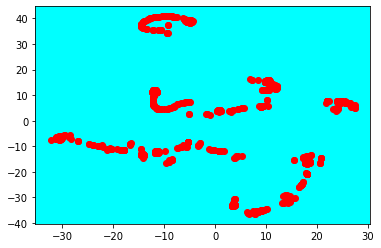

In [42]:
# Plot the results

plt.scatter(crypto_features[:,0], crypto_features[:,1], color='red')
ax = plt.gca()
ax.set_facecolor('cyan')


plt.show()

In [43]:
# Find out the best number of clusters by creating "the elbow curve" plot
inertia = [] #list
# Same as k = list(range(1, 11))
#Randomly initialize the <k> starting centroids 
k = list(range(1, 25))
#Each data point is assigned to its nearest centroid, then the centroids are recomputed
# as the mean of the data points assigned to the respective cluster

In [44]:
# Looking for the best k is done using  an elbow curve, where the x axis is the K-value
# and the y axis is some objective function (f.e. inertia)
# iterate through clusters
for i in k:
    # use KMeans.(n_clusters=i, random_state=0) fx
    KMs = KMeans(n_clusters=i, random_state=0)
    # modify your DataFrame using KMeans.fit(DataFrame)
    KMs.fit(crypto_features)
    inertia.append(KMs.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\jksmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,468037.875000
1,2,254379.484375
2,3,158211.765625
3,4,73377.929688
4,5,49031.550781
5,6,36150.054688
6,7,24580.476562
7,8,16927.300781
8,9,13515.369141
9,10,10324.508789


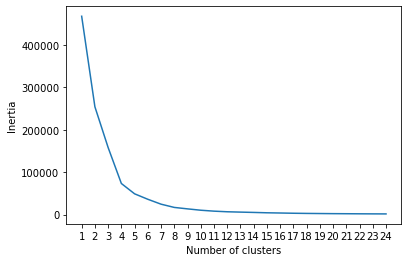

In [45]:
# Plot the elbow curve to find the best candidate(s) for k

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,25))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
# Initialize the K-Means model to identify clusters in the dataset.
model = KMeans(n_clusters=4, random_state=0)
# Fitting model
model.fit(crypto_features)

KMeans(n_clusters=4, random_state=0)

In [48]:
# Predict clusters
predictions = model.predict(crypto_features)
predictions

array([0, 0, 0, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 0, 1, 0, 2, 1, 0, 3, 1, 1,
       0, 2, 0, 3, 0, 3, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 2, 3,
       2, 2, 2, 1, 1, 0, 3, 0, 3, 1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 0,
       2, 0, 0, 1, 3, 2, 3, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 3, 2, 0,
       1, 3, 0, 3, 1, 1, 3, 3, 3, 3, 0, 0, 0, 1, 2, 0, 0, 3, 2, 0, 1, 0,
       3, 1, 0, 0, 3, 3, 0, 1, 2, 0, 3, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0,
       1, 1, 2, 1, 3, 3, 0, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 0, 2, 3, 2, 0,
       1, 0, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 2, 0, 3, 0, 1, 3, 0, 1, 1,
       0, 3, 0, 2, 2, 3, 0, 1, 2, 3, 0, 1, 3, 1, 0, 0, 0, 3, 0, 0, 3, 0,
       2, 3, 2, 0, 3, 3, 1, 3, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 3, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 3, 1, 0,
       3, 0, 2, 1, 0, 3, 0, 2, 1, 1, 0, 2, 1, 3, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 3, 3, 0, 1, 0, 2, 3, 0, 1, 1, 1, 1, 0, 0,

In [66]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
crypto_clusters = pd.concat([crypto_ctt, crypto_pca_df],axis=1)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
crypto_clusters['Class'] = model.labels_

# Print the shape of the clustered_df
print(crypto_clusters.shape)
crypto_clusters.head(10)

(685, 5)


,TotalCoinsMined,TotalCoinSupply,pc1,pc2,Class
42,4.199995e+01,42,-0.174299,1.261393,0
404,1.055185e+09,532000000,-0.159664,1.260855,0
808,0.000000e+00,0,-0.125816,0.806498,0
1337,2.927942e+10,314159265359,0.339533,1.927162,1
BTC,1.792718e+07,21000000,-0.192564,-1.428111,3
ETH,1.076842e+08,0,-0.255324,-2.061941,3
LTC,6.303924e+07,84000000,-0.240422,-0.973239,2
DASH,9.031294e+06,22000000,-0.188588,1.350595,1
XMR,1.720114e+07,0,-0.280179,-2.214944,3
ETC,1.133597e+08,210000000,-0.255245,-2.061944,3


In [67]:
# The function should add a new column containing the cluster value of each sample (row).
# The function should return a copy of the new dataframe with predicted clusters
crypto_feat = pd.DataFrame(crypto_clusters)
crypto_feat["class"] = model.labels_ 
#crypto_feat.columns = ["col1", "col2", "class"]
crypto_feat.head()

,TotalCoinsMined,TotalCoinSupply,pc1,pc2,Class,class
42,4.199995e+01,42,-0.174299,1.261393,0,0
404,1.055185e+09,532000000,-0.159664,1.260855,0,0
808,0.000000e+00,0,-0.125816,0.806498,0,0
1337,2.927942e+10,314159265359,0.339533,1.927162,1,1
BTC,1.792718e+07,21000000,-0.192564,-1.428111,3,3


In [68]:
# The function should add a new column containing the cluster value of each sample (row).
# The function should return a copy of the new dataframe with predicted clusters
crypto_features = pd.DataFrame(crypto_features)
crypto_features["class"] = model.labels_ 
crypto_features.columns = ["col1", "col2", "class"]
crypto_features.head()

,col1,col2,class
0,-11.333694,11.282209,0
1,-5.181246,7.365919,0
2,-14.189418,-13.019871,0
3,23.809378,4.526497,1
4,17.685989,-15.504783,3


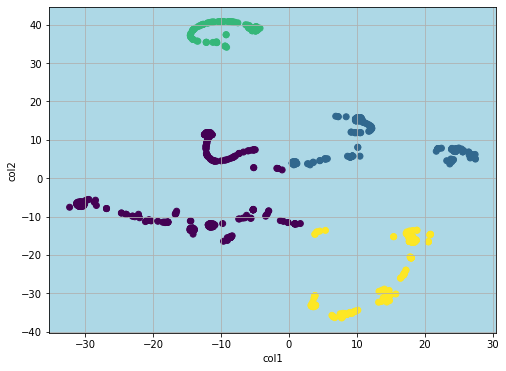

In [69]:
# Create a function called show_clusters(df) that will create a scatter plot of your dataset
plt.figure(figsize=(8,6))
plt.scatter(crypto_features['col1'], crypto_features['col2'], c=crypto_features['class'])
plt.xlabel('col1')
plt.ylabel('col2')

ax = plt.gca()
ax.set_facecolor('lightblue')
plt.grid()
plt.show()